In [1]:
import pandas as pd 

In [33]:

import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import OneHotEncoder


In [3]:
df=pd.read_csv('food_delivery_prediction.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [5]:
print(df['Delivery_Time_min'].head(10))

0    43
1    84
2    59
3    37
4    68
5    57
6    49
7    46
8    35
9    73
Name: Delivery_Time_min, dtype: int64


In [9]:
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']


In [6]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


In [9]:
# Handle missing values: 
# For numeric columns, fill missing values with the median
df['Distance_km'].fillna(df['Distance_km'].median(), inplace=True)
df['Preparation_Time_min'].fillna(df['Preparation_Time_min'].median(), inplace=True)
df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median(), inplace=True)

# For categorical columns, fill missing values with the mode
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)
df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0], inplace=True)
df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0], inplace=True)
df['Vehicle_Type'].fillna(df['Vehicle_Type'].mode()[0], inplace=True)

C:\Users\Prachi\AppData\Local\Temp\ipykernel_21376\667795869.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Distance_km'].fillna(df['Distance_km'].median(), inplace=True)
C:\Users\Prachi\AppData\Local\Temp\ipykernel_21376\667795869.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [11]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


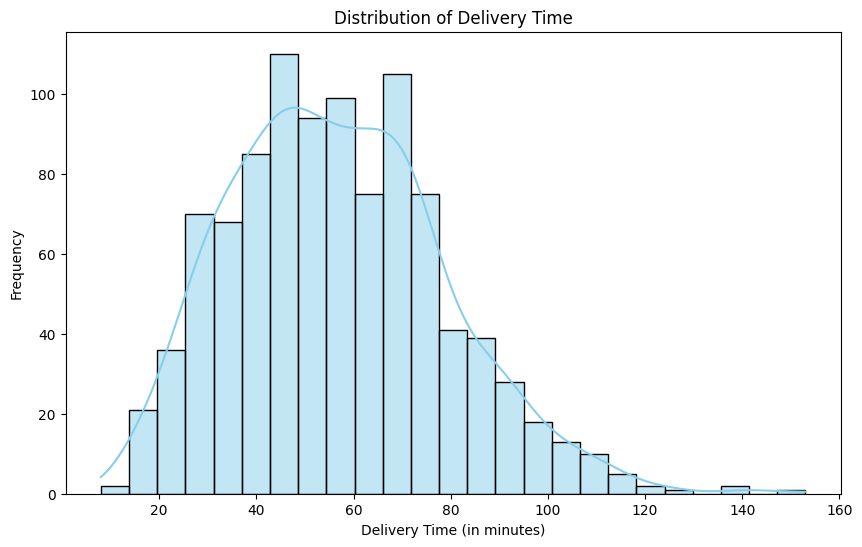

In [13]:
# EDA: Plotting data distributions and relationships
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_Time_min'], kde=True, color='skyblue')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (in minutes)')
plt.ylabel('Frequency')
plt.show()

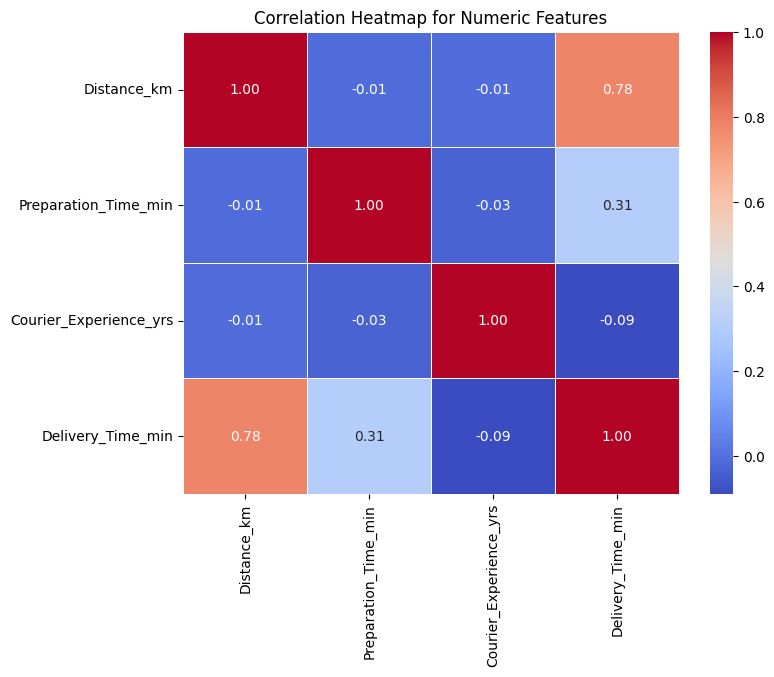

In [15]:
# Correlation heatmap for numeric features
numeric_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

In [17]:
# Separate features and target
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

In [19]:
# Numeric features to scale
numeric_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
# Categorical features to encode
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

# Apply standard scaling for numeric features and one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# Process the features
X_processed = preprocessor.fit_transform(X)

In [21]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

In [49]:
print("\nTraining Linear Regression")
lr = GridSearchCV(
    LinearRegression(),
    {'fit_intercept': [True, False]},
    cv=3,
    scoring='neg_mean_squared_error'
)
lr.fit(X_train, y_train)
lr_pred = lr.best_estimator_.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)



Training Linear Regression


In [29]:
print("\nTraining Lasso Regression")
lasso = GridSearchCV(
    Lasso(),
    {'alpha': [0.001, 0.01, 0.1, 1]},
    cv=3,
    scoring='neg_mean_squared_error'
)
lasso.fit(X_train, y_train)
lasso_pred = lasso.best_estimator_.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)



Training Lasso Regression


In [31]:
print("\nTraining Random Forest")
rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    },
    cv=3,
    scoring='neg_mean_squared_error'
)
rf.fit(X_train, y_train)
rf_pred = rf.best_estimator_.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)



Training Random Forest


In [35]:
print("\nTraining Gradient Boosting")
gb = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    cv=3,
    scoring='neg_mean_squared_error'
)
gb.fit(X_train, y_train)
gb_pred = gb.best_estimator_.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)



Training Gradient Boosting


In [51]:
#Model Comparision
results = {
    'Linear Regression': {'RMSE': lr_rmse, 'R²': lr_r2},
    'Lasso Regression': {'RMSE': lasso_rmse, 'R²': lasso_r2},
    'Random Forest': {'RMSE': rf_rmse, 'R²': rf_r2},
    'Gradient Boosting': {'RMSE': gb_rmse, 'R²': gb_r2}
}

results_df = pd.DataFrame(results).T.sort_values('RMSE')
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                        RMSE        R²
Linear Regression   8.826470  0.826189
Lasso Regression    8.843779  0.825507
Gradient Boosting   9.731739  0.788708
Random Forest      10.208743  0.767487


In [42]:
best_model_name = results_df['RMSE'].idxmin()
best_model = {
    'Linear Regression': lr,
    'Lasso Regression': lasso.best_estimator_,
    'Random Forest': rf.best_estimator_,
    'Gradient Boosting': gb.best_estimator_
}[best_model_name]

joblib.dump(best_model, 'best_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

Text(0.5, 0, 'RMSE')

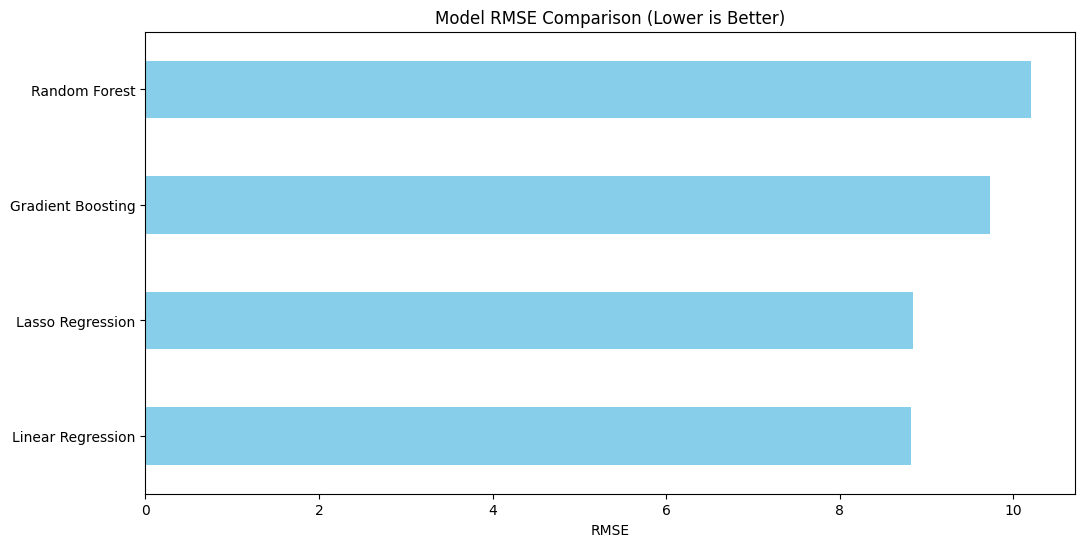

In [53]:
plt.figure(figsize=(12, 6))
results_df['RMSE'].plot(kind='barh', color='skyblue')
plt.title('Model RMSE Comparison (Lower is Better)')
plt.xlabel('RMSE')



In [52]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Predict on training data
    y_train_pred = model.predict(X_train)
    # Predict on test data
    y_test_pred = model.predict(X_test)
    
    # Calculate RMSE and R² for training data
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculate RMSE and R² for test data
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    return {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2
    }

# Evaluate Linear Regression
lr_results = evaluate_model(lr, X_train, X_test, y_train, y_test)
print("\nLinear Regression Performance:")
print(lr_results)

# Evaluate Lasso Regression
lasso_results = evaluate_model(lasso.best_estimator_, X_train, X_test, y_train, y_test)
print("\nLasso Regression Performance:")
print(lasso_results)

# Evaluate Random Forest
rf_results = evaluate_model(rf.best_estimator_, X_train, X_test, y_train, y_test)
print("\nRandom Forest Performance:")
print(rf_results)

# Evaluate Gradient Boosting
gb_results = evaluate_model(gb.best_estimator_, X_train, X_test, y_train, y_test)
print("\nGradient Boosting Performance:")
print(gb_results)



Linear Regression Performance:
{'Train RMSE': np.float64(10.839069468936797), 'Test RMSE': np.float64(8.82647014987338), 'Train R²': 0.7630020365990979, 'Test R²': 0.8261894538886112}

Lasso Regression Performance:
{'Train RMSE': np.float64(10.839628152008407), 'Test RMSE': np.float64(8.843779412353681), 'Train R²': 0.7629776045825141, 'Test R²': 0.8255070786527945}

Random Forest Performance:
{'Train RMSE': np.float64(6.50772324555964), 'Test RMSE': np.float64(10.20874324715804), 'Train R²': 0.9145683557040662, 'Test R²': 0.7674873568544265}

Gradient Boosting Performance:
{'Train RMSE': np.float64(9.75930131551915), 'Test RMSE': np.float64(9.731738879414529), 'Train R²': 0.8078687234207185, 'Test R²': 0.7887080722504299}
